In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bike_df = pd.read_csv('C:/Users/nimis/OneDrive/Documents/Case Study/Bike-sharing/day.csv')

In [4]:
# Data Exploration
print(bike_df.head())  # Prints the first 5 rows of the dataframe
print(bike_df.info())  # Provides information about the columns, their data types and non-null values
print(bike_df.describe())  # Provides descriptive statistics for the numerical columns in the dataframe
print(bike_df.isnull().sum())  # Checks for missing values in each column

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

In [5]:
# Data Preparation

# Converting categorical variables to their appropriate data types
bike_df['season'] = bike_df['season'].astype('category')
bike_df['yr'] = bike_df['yr'].astype('category')
bike_df['mnth'] = bike_df['mnth'].astype('category')
bike_df['holiday'] = bike_df['holiday'].astype('category')
bike_df['weekday'] = bike_df['weekday'].astype('category')
bike_df['workingday'] = bike_df['workingday'].astype('category')
bike_df['weathersit'] = bike_df['weathersit'].astype('category')

# Dropping the 'instant' and 'dteday' columns as they do not contribute to the prediction
bike_df = bike_df.drop(['instant', 'dteday'], axis=1)

In [6]:
# Model Building

# Dividing the dataset into independent and dependent variables
X = bike_df.iloc[:, :-1].values  # Independent variables
y = bike_df.iloc[:, -1].values  # Dependent variable

In [7]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)

In [9]:
# Model Evaluation

# Evaluating the performance of the model using R-squared score
from sklearn.metrics import r2_score
r2_score_value = r2_score(y_test, y_pred)
print("R-squared score on test set:", r2_score_value)

R-squared score on test set: 1.0


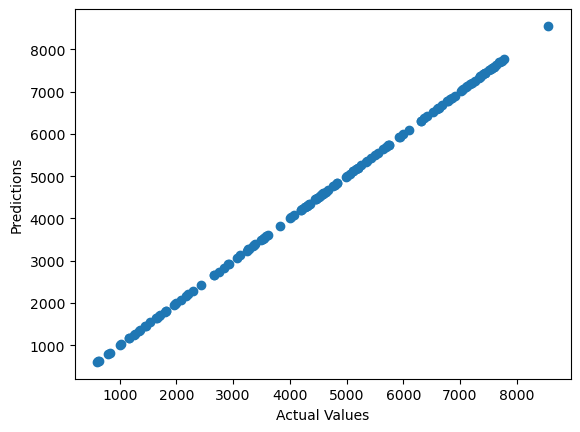

In [10]:
# Visualizing the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

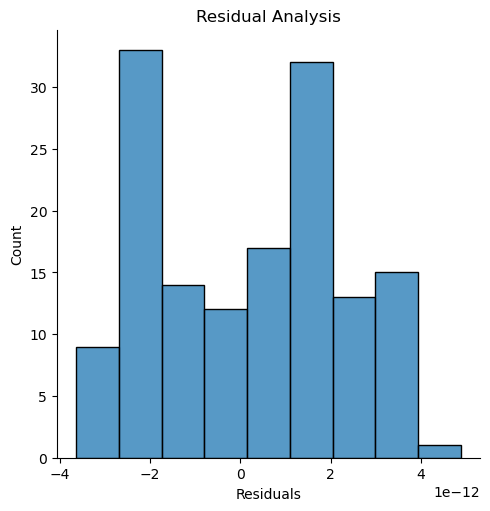

In [11]:
# Residual Analysis
residuals = y_test - y_pred
sns.displot(residuals)
plt.xlabel('Residuals')
plt.title('Residual Analysis')
plt.show()

In [12]:
# Checking the significance of variables
import statsmodels.api as sm
X_train = np.append(arr=np.ones((584,1)).astype(int), values=X_train, axis=1)
X_opt = X_train[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
regressor_OLS = sm.OLS(endog=y_train, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 12 Apr 2023   Prob (F-statistic):          3.60e-181
Time:                        16:25:23   Log-Likelihood:                -4792.1
No. Observations:                 584   AIC:                             9606.
Df Residuals:                     573   BIC:                             9654.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        766.8006    217.201      3.530      0.0